In [ ]:
!pip install pandas


In [ ]:
from google.colab import files

uploaded = files.upload()  # Chọn file ZIP từ máy tính


Saving titanic.zip to titanic.zip


In [ ]:
import zipfile

with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("data_folder")  # giải nén vào thư mục "data_folder"


In [ ]:
import os
os.listdir()


['.config', 'titanic.zip', 'data_folder', 'sample_data']

Accuracy: 0.8271604938271605


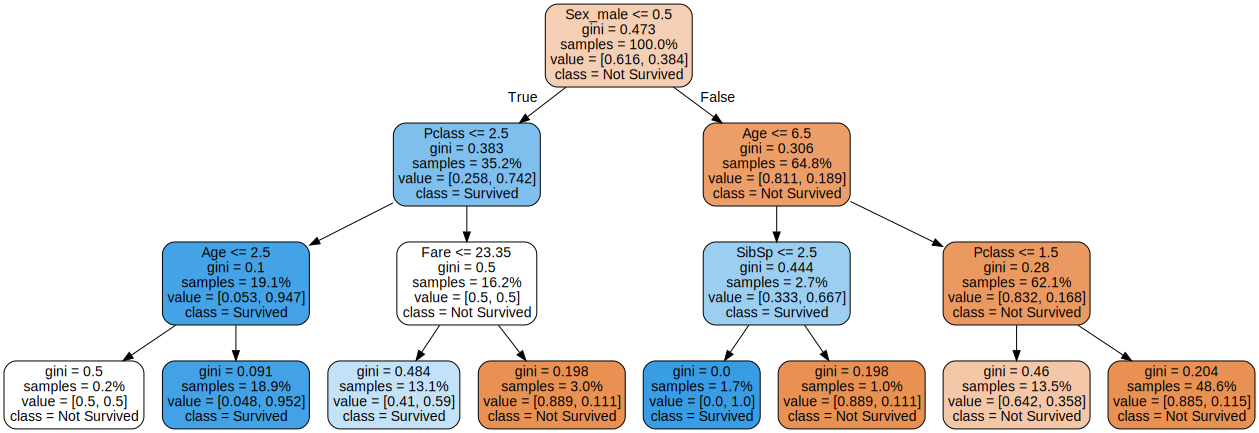

In [ ]:
import pandas as pd

# 1️⃣ Đọc file train.csv từ đường dẫn đúng
train_df = pd.read_csv("data_folder/train.csv")  # ← đây là đường dẫn bạn cần

# 2️⃣ Tiền xử lý dữ liệu
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# 3️⃣ Chuyển biến phân loại thành biến giả
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# 4️⃣ Chọn đặc trưng và nhãn
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X_train = train_df[features]
y_train = train_df[target]

# =========================
# 5️⃣ Decision Tree
# =========================
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred))

# =========================
# 6️⃣ Vẽ cây quyết định
# =========================
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Not Survived','Survived'],
                           filled=True, rounded=True,
                           proportion=True)
graph = graphviz.Source(dot_data)
graph


